In [1]:
import re

def average_every_r_elements(lst):
    averages = []
    delta=25
    for i in range(0, len(lst), delta):
        subset = lst[i:i+delta]
        averages.append(sum(subset) / len(subset) if subset else 0)
    return averages

def parse_llama_data(filepath):
    pattern = re.compile(r'"lm_loss": (\d+\.\d+E[\+\-]\d+)', re.IGNORECASE)
    lm_loss_values = []

    with open(filepath, 'r') as file:
        for line in file:
            
            matches = pattern.findall(line)
            lm_loss_values.extend(matches)

    return [float(value) for value in lm_loss_values]

For data confidentiality reasons, we only provide the training logs of the LLaMA-2-7B model here.

The training logs of the GPT-2 and BERT models will be made public after being sanitized in the near future. 

Note that the parsing process of the GPT-2 and BERT model training logs and the plotting of the Fig.9 is the same as that used for LLaMA-2-7B model.

In [2]:
# Parse loss logs of LLaMA-2-7B model
llama_181 =average_every_r_elements(parse_llama_data('./loss_measurement/llama7b_181.txt'))
llama_241 = average_every_r_elements(parse_llama_data('./loss_measurement/llama7b_241.txt'))
llama_421 = average_every_r_elements(parse_llama_data('./loss_measurement/llama7b_421.txt'))
llama_811 = average_every_r_elements(parse_llama_data('./loss_measurement/llama7b_811.txt'))
seed=average_every_r_elements(parse_llama_data('./loss_measurement/llama7b_181_seed.txt'))


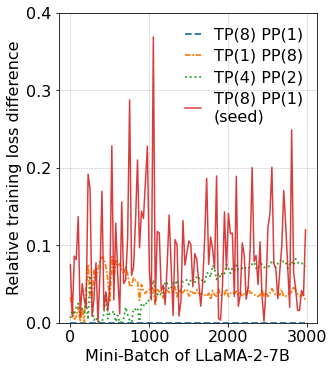

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

matplotlib.rcParams.update({"font.size": 16,'lines.linewidth': 1.8})

style=[ '--','-', '-.', ':', (0,(3, 1, 1, 1)), 'dashed',(0,(3, 1, 1, 1,1))]
delta = 25
mini_batch = 3000
fig, ax = plt.subplots(figsize=(4.5,5))

ax.plot([abs(llama_181[i]-llama_181[i])  for i in range(0,mini_batch//delta)],label="TP(8) PP(1)",linestyle=style[0])
ax.plot([abs(llama_241[i]-llama_181[i])  for i in range(0,mini_batch//delta)],label="TP(1) PP(8)",linestyle=style[4])
ax.plot([abs(llama_811[i]-llama_181[i])  for i in range(0,mini_batch//delta)],label="TP(4) PP(2)",linestyle=style[3])
ax.plot([abs(seed[i]-llama_181[i])   for i in range(0,mini_batch//delta)],label="TP(8) PP(1)\n(seed)",linewidth=1.5,c="#d62728",alpha=0.9)

ax.legend(fontsize=16,loc="upper right",ncol=1,handlelength=1,labelspacing=0.4,frameon=False)
ax.grid(linestyle = 'dashed', linewidth = 0.5)

ax.set_ylim([0,0.4])
ax.set_xticks([0,40,80,120],["0","1000","2000","3000"],)
ax.set_yticks([0,0.1,0.2,0.3,0.4],)
ax.set_xlabel('Mini-Batch of LLaMA-2-7B')
ax.set_ylabel('Relative training loss difference')

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
